<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="left" width="30%"><img src="images/IST_logo.png" width="50%"></td>
        <td width="40%"></td>
        <td align="right" width="30%"><img src="images/ds_logo.png" width="25%"></td>
    </tr>
    <tr><td align="left" width="30%"></td>
        <td width="40%"><p align="center"><img src="images/title.png"</td>
        <td align="right" width="30%"></td>
    </tr>
</table>

<h1 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Lab 3: Classification (cont.)</h1>

<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Random Forests</h2>

<strong>Random Forests</strong>, implemented through the <code>RandomForestClassifier</code> in the <code>sklearn.ensemble</code>
package, are one of the most powerful classification technique, simple and easy to apply.

It trains a set of <i>n</i> decision trees, that are combined in an ensemble of <code>n_estimators</code>. Each tree, 
however, is trained over a different subset of the original training data, first by choosing a subset of <i>k</i>
variables describing the data, with <i>k</i> determined by the <code>max_features</code> parameter. Beside many other
parameters we can choose the maximum size of each tree, through the <code>max_depth</code> parameter. 

Next, we can see the results achieved by a set of parameters combinations.

<Figure size 432x288 with 0 Axes>

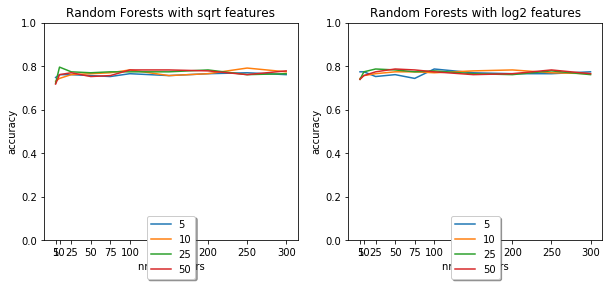

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
%load functions.ipynb
import ipynb.fs.defs.functions as func

data: pd.DataFrame = pd.read_csv('data/diabetes.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
    func.multiple_line_chart(axs[0, k], n_estimators, values, 'Random Forests with %s features'%f, 'nr estimators', 
                             'accuracy', percentage=True)
    
plt.show()

<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="center" width="30%"><a href="Lab33_trees.ipynb"><img src="images/prev.png"></a></td>
        <td width="40%"></td>
        <td align="center" width="30%"><a href="Lab4_evaluation.ipynb"><img src="images/next.png"></a></td>
    </tr>
</table>